In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 - Data Preparation and Preprocessing

## Understand Dataset

### Load datatset
* Categories/domains 
* Data types



In [17]:
df = pd.read_csv("data.csv")
df.head()

C:\Users\James\AppData\Local\Temp\ipykernel_4472\2036481670.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [18]:
print("Dataset Size: ", df.size, "\n")

df.info()

Dataset Size:  4140201 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [19]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

* Location, Classification, SubClassification appear to have roughly 30%-40% Null values
* Area having roughly 60% Null

In [20]:
#Print all columns of dataset
print("Categories: \n", df.columns)

#Print number of unique values of each column
print("\nSize of each variation of categories:")
for column in df:
    print(column + ":", df[column].unique().size)


Categories: 
 Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

Size of each variation of categories:
Id: 318477
Title: 168065
Company: 40629
Date: 163
Location: 66
Area: 20
Classification: 31
SubClassification: 339
Requirement: 234288
FullDescription: 250902
LowestSalary: 11
HighestSalary: 11
JobType: 5


In [21]:
#No need to print these are they are all unique and provide no useful information
exclude = ['Id', 'Requirement', 'FullDescription']
for column in df:
    if column not in exclude:
        print("Unique values in", column, "column:\n", df[column].unique(), "\n")

Unique values in Title column:
 ['Casual Stock Replenisher'
 'RETAIL SALES SUPERSTARS and STYLISTS Wanted - Womens Fashion - SUNSHINE PLAZA'
 'Team member - Belrose' ... 'Web Content Writer - June 2019 contract'
 'Brand Director - Global Premium Brand' 'Head of Operations - EOI'] 

Unique values in Company column:
 ['Aldi Stores' 'LB Creative Pty Ltd' 'Anaconda Group Pty Ltd' ...
 'Radiology Tasmania' 'Maryvale Private Hospital'
 'Immanuel Lutheran College'] 

Unique values in Date column:
 ['2018-10-07T00:00:00.000Z' '2018-10-06T00:00:00.000Z'
 '2018-10-05T00:00:00.000Z' '2018-10-04T00:00:00.000Z'
 '2018-10-03T00:00:00.000Z' '2018-10-02T00:00:00.000Z'
 '2018-10-01T00:00:00.000Z' '2018-10-10T00:00:00.000Z'
 '2018-10-09T00:00:00.000Z' '2018-10-08T00:00:00.000Z'
 '2018-10-17T00:00:00.000Z' '2018-10-16T00:00:00.000Z'
 '2018-10-15T00:00:00.000Z' '2018-10-14T00:00:00.000Z'
 '2018-10-13T00:00:00.000Z' '2018-10-12T00:00:00.000Z'
 '2018-10-11T00:00:00.000Z' '2018-10-21T00:00:00.000Z'
 '2018-10

In [22]:
for column in df:
    if column not in exclude:
        print("Value counts for", column, "column:\n", df[column].value_counts(), "\n")

Value counts for Title column:
 Project Manager                                                               1298
Business Analyst                                                               830
Business Development Manager                                                   817
Administration Assistant                                                       725
Executive Assistant                                                            660
                                                                              ... 
P/T General Practitioner (VR) - 73% of billings or $150/h - Fairfield Area       1
Site Manager - United/Pie Face (ALL VIC)                                         1
Safety Leader – Pacific Zone                                                     1
Market Advocacy Development Manager Australian Market                            1
Head of Operations - EOI                                                         1
Name: Title, Length: 168065, dtype: int64 

Value count

In [23]:
# find how many locations have all NaN values in Area column
df[df['Area'].isnull()]['Location'].nunique()
print("Number of locations with all NaN values in Area column:", df[df['Area'].isnull()]['Location'].nunique())
# find how many locations have all non NaN values in Area column and print them
areaLocations = df[df['Area'].notnull()]['Location'].nunique()
print("Number of locations with all non NaN values in Area column:", areaLocations)
print("Locations with all non NaN values in Area column:", df[df['Area'].notnull()]['Location'].unique())


Number of locations with all NaN values in Area column: 65
Number of locations with all non NaN values in Area column: 4
Locations with all non NaN values in Area column: ['Sydney' 'Brisbane' 'Melbourne' 'Perth']


Only the four largest cities have Area data included in their job postings.

In [24]:
#display all subclassifications in IT
print(df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].unique())

['Help Desk & IT Support' 'Sales - Pre & Post'
 'Networks & Systems Administration' 'Programme & Project Management'
 'Security' 'Consultants' 'Architects' 'Other' 'Business/Systems Analysts'
 'Developers/Programmers' 'Web Development & Production'
 'Engineering - Software' 'Product Management & Development'
 'Engineering - Network' 'Team Leaders' 'Testing & Quality Assurance'
 'Management' 'Database Development & Administration' 'Telecommunications'
 'Technical Writing' 'Engineering - Hardware' 'Computer Operators']


In [25]:
# Find market share of each Classification over time
# Create a new dataframe with the date and classification columns
MarketShare = df[['Date', 'Classification']].copy()

#create new df with Developers/Programmers, Business/System Analysts and Programme & Project Management
df3 = df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts().nlargest(3)
# print mean salary of top 3 subclassifications in IT

#print top 3 subclassifications in IT
print(df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts().nlargest(3))


Developers/Programmers            4211
Business/Systems Analysts         2986
Programme & Project Management    2413
Name: SubClassification, dtype: int64


In [26]:
#find the largest SubClassification in the data set
print(df['SubClassification'].value_counts().nlargest(5))


Other                        11349
Management                    6236
Chefs/Cooks                   4600
Administrative Assistants     4572
Developers/Programmers        4211
Name: SubClassification, dtype: int64


### Job Classification Visualisations

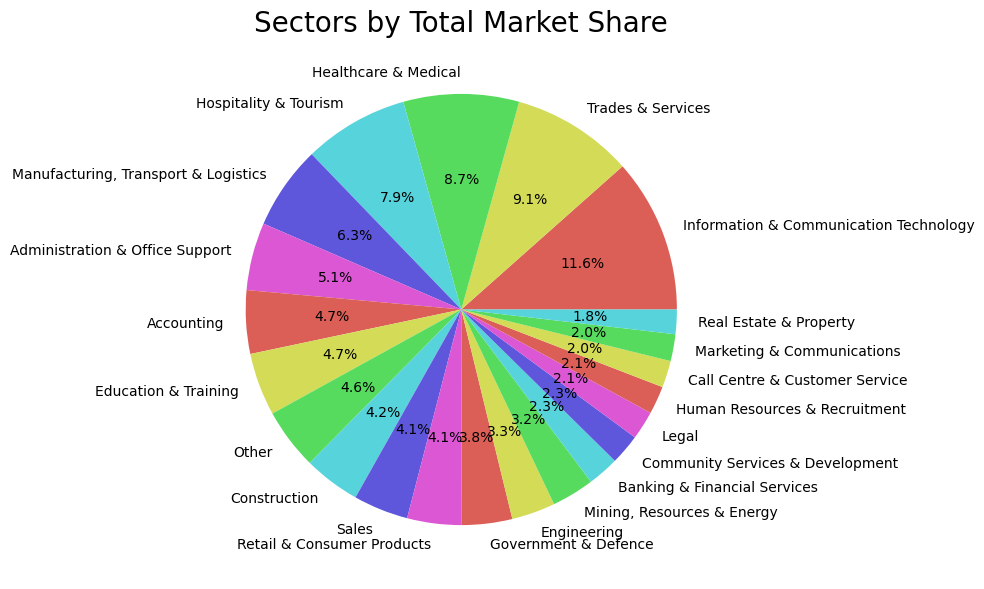

In [27]:
def split_label(label, max_length):
    words = label.split(' ')
    lines = []
    current_line = ''
    for word in words:
        if len(current_line + ' ' + word) <= max_length:
            current_line += ' ' + word
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)  # Don't forget the last line
    return '\n'.join(lines)
    
# Calculate the percentage of each classification
classification_counts = df['Classification'].value_counts()
classification_percentages = classification_counts / classification_counts.sum()

# Calculate the percentage of each Location
location_counts = df['Location'].value_counts()
location_percentages = location_counts / location_counts.sum()
colors = sns.color_palette("hls")

# Set the threshold for lumping small classifications
threshold = 0.01  # Set the threshold to 1% (0.01)
threshold2 = 0.008  # Set the threshold to 0.5% (0.008)

# Convert the classification percentages to a DataFrame
classification_percentages_df = pd.DataFrame(classification_percentages)
location_percentages_df = pd.DataFrame(location_percentages)

# Create a new column 'ClassificationLumped' based on the threshold
df['ClassificationLumped'] = df['Classification'].copy()
df.loc[df['Classification'].isin(classification_percentages_df[classification_percentages_df['Classification'] < threshold].index), 'ClassificationLumped'] = 'Other'
# Create a new column 'LocationLumped' based on the threshold
df['LocationLumped'] = df['Location'].copy()
df.loc[df['Location'].isin(location_percentages_df[location_percentages_df['Location'] < threshold2].index), 'LocationLumped'] = 'Other'

# Plot the pie chart
plt.figure(figsize=(7, 7))
df['ClassificationLumped'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Sectors by Total Market Share', fontsize=20)
plt.ylabel('')
plt.show()



## Data Preprocessing

### Normalise Formats


##### Normalise Date

In [28]:
#explore data types in Date column
df.dtypes

Id                      object
Title                   object
Company                 object
Date                    object
Location                object
Area                    object
Classification          object
SubClassification       object
Requirement             object
FullDescription         object
LowestSalary             int64
HighestSalary            int64
JobType                 object
ClassificationLumped    object
LocationLumped          object
dtype: object

Id                                   object
Title                                object
Company                              object
Date                    datetime64[ns, UTC]
Location                             object
Area                                 object
Classification                       object
SubClassification                    object
Requirement                          object
FullDescription                      object
LowestSalary                          int64
HighestSalary                         int64
JobType                              object
ClassificationLumped                 object
LocationLumped                       object
dtype: object

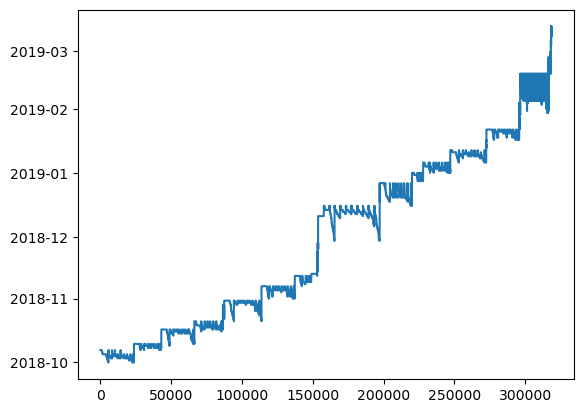

In [29]:
#normalise the data in Date column
df["Date"] = pd.to_datetime(df["Date"])
#visualise Date column in plot
df['Date'].plot()
df.dtypes


##### Normalise Id

* Was unable to normalise Id column straight away due to various datatypes being contained within the column

In [30]:
#check Id column for non integer values
print(df['Id'].apply(lambda x: isinstance(x, int)).sum())
print(len(df['Id']))

187405
318477


In [31]:
#Check where invalid entries were found
print(df['Id'][187405:].head(10))

187405    37922161&searchrequesttoken=2a17e27a-d532-470c...
187406    37922151&searchrequesttoken=2a17e27a-d532-470c...
187407    37922143&searchrequesttoken=2a17e27a-d532-470c...
187408    37922140&searchrequesttoken=16638339-1741-4903...
187409    37922135&searchrequesttoken=16638339-1741-4903...
187410    37922127&searchrequesttoken=16638339-1741-4903...
187411    37922104&searchrequesttoken=16638339-1741-4903...
187412    37922099&searchrequesttoken=16638339-1741-4903...
187413    37922085&searchrequesttoken=16638339-1741-4903...
187414    37922055&searchrequesttoken=16638339-1741-4903...
Name: Id, dtype: object


Many invalid Id entries found. When tried to normalise to a int64 perviously, this is why.

In [32]:
#remove the remaining non integer values from each Id column once detected
df['Id'] = df['Id'].apply(lambda x: int(str(x).split('&')[0]))

In [33]:
#check Id column for non integer values
print(df['Id'].apply(lambda x: isinstance(x, int)).sum())
print(len(df['Id']))

318477
318477


In [34]:
#Check where invalid entries were found
print(df['Id'][187405:].head(10))

187405    37922161
187406    37922151
187407    37922143
187408    37922140
187409    37922135
187410    37922127
187411    37922104
187412    37922099
187413    37922085
187414    37922055
Name: Id, dtype: int64


In [35]:
df["Id"] = df["Id"].astype(np.int64)
df.dtypes


Id                                    int64
Title                                object
Company                              object
Date                    datetime64[ns, UTC]
Location                             object
Area                                 object
Classification                       object
SubClassification                    object
Requirement                          object
FullDescription                      object
LowestSalary                          int64
HighestSalary                         int64
JobType                              object
ClassificationLumped                 object
LocationLumped                       object
dtype: object

In [36]:
#check for duplicate Id values
print("Id column duplicates: ", df['Id'].duplicated().sum())


Id column duplicates:  14165


### Handle Missing Data


In [37]:
print("Before:\n")
df.info()

Before:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Id                    318477 non-null  int64              
 1   Title                 318477 non-null  object             
 2   Company               306473 non-null  object             
 3   Date                  318477 non-null  datetime64[ns, UTC]
 4   Location              197229 non-null  object             
 5   Area                  122658 non-null  object             
 6   Classification        197229 non-null  object             
 7   SubClassification     197229 non-null  object             
 8   Requirement           318470 non-null  object             
 9   FullDescription       302302 non-null  object             
 10  LowestSalary          318477 non-null  int64              
 11  HighestSalary         318477 non-null  int6

In [38]:

# drop all rows with NaN values in every column
df.dropna(how='all', inplace=True)
print("\nAfter:\n")
df.info()


After:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   Id                    318477 non-null  int64              
 1   Title                 318477 non-null  object             
 2   Company               306473 non-null  object             
 3   Date                  318477 non-null  datetime64[ns, UTC]
 4   Location              197229 non-null  object             
 5   Area                  122658 non-null  object             
 6   Classification        197229 non-null  object             
 7   SubClassification     197229 non-null  object             
 8   Requirement           318470 non-null  object             
 9   FullDescription       302302 non-null  object             
 10  LowestSalary          318477 non-null  int64              
 11  HighestSalary         318477 non-null  int6

Was found that no NaN rows exist

### Remove Duplicates

In [39]:
#check for duplicates in df dataframe
print("Dataframe duplicates: ", df.duplicated().sum(), "\n")
for row in df:
    print(row, " column duplicates: ", df[row].duplicated().sum())


Dataframe duplicates:  108 

Id  column duplicates:  14165
Title  column duplicates:  150412
Company  column duplicates:  277848
Date  column duplicates:  318314
Location  column duplicates:  318411
Area  column duplicates:  318457
Classification  column duplicates:  318446
SubClassification  column duplicates:  318138
Requirement  column duplicates:  84189
FullDescription  column duplicates:  67575
LowestSalary  column duplicates:  318466
HighestSalary  column duplicates:  318466
JobType  column duplicates:  318472
ClassificationLumped  column duplicates:  318454
LocationLumped  column duplicates:  318463


* Dataset row duplicates found 
* Duplicates found in Id column which should be removed

In [40]:
#Remove duplicates from Id column
df.drop_duplicates(subset=['Id'], inplace=True)
#check for duplicate Id values
print("Id column duplicates: ", df['Id'].duplicated().sum())

Id column duplicates:  0


In [41]:
#check for duplicates in df dataframe
print("Dataframe duplicates: ", df.duplicated().sum(), "\n")
for row in df:
    print(row, " column duplicates: ", df[row].duplicated().sum())


Dataframe duplicates:  0 

Id  column duplicates:  0
Title  column duplicates:  136320
Company  column duplicates:  263685
Date  column duplicates:  304149
Location  column duplicates:  304246
Area  column duplicates:  304292
Classification  column duplicates:  304281
SubClassification  column duplicates:  303973
Requirement  column duplicates:  70102
FullDescription  column duplicates:  56312
LowestSalary  column duplicates:  304301
HighestSalary  column duplicates:  304301
JobType  column duplicates:  304307
ClassificationLumped  column duplicates:  304289
LocationLumped  column duplicates:  304298


### Remove Redundant Columns


After reviewing the requirements of the assignment, it was decided that the following columns were of no use:
* Id
* Title
* Company
* Job Type

They were necessary for the previous steps, but going forward they will be removed.

In [42]:
# remove id, Title, Company, and JobType columns
df.drop(['Id', 'Title', 'Company', 'JobType'], axis=1, inplace=True)
df.head()

,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,ClassificationLumped,LocationLumped
0,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,Retail & Consumer Products,Sydney
1,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,Retail & Consumer Products,Other
2,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,Retail & Consumer Products,Brisbane
3,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,Retail & Consumer Products,Other
4,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,Call Centre & Customer Service,Sydney


### Save preprocessed csv

In [43]:
df.to_csv("preprocessed_data.csv")